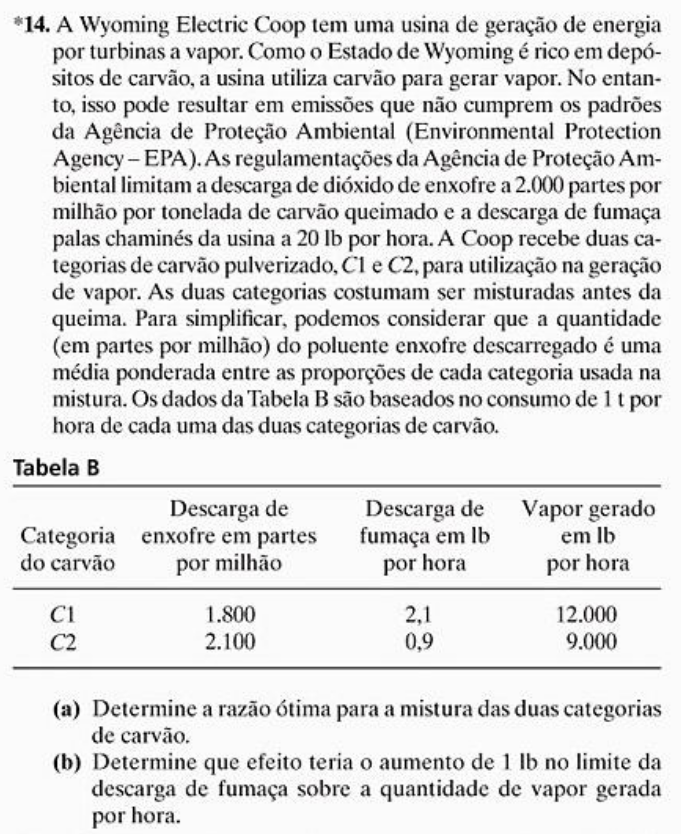

In [1]:
%pip install cplex
%pip install docplex

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
from docplex.mp.model import Model

# Criação do modelo com um nome descritivo
model = Model('Mistura_Otima_Carvao_Wyoming')

In [3]:
# --- Parâmetros extraídos do enunciado e da Tabela B ---

# Nomes dos tipos de carvão para referência
tipos_carvao = ['C1', 'C2']

# Dados por tonelada de carvão queimada por hora
descarga_enxofre_ppm = {'C1': 1800, 'C2': 2100}
descarga_fumaca_lb_h = {'C1': 2.1, 'C2': 0.9}
vapor_gerado_lb_h = {'C1': 12000, 'C2': 9000}

# Limites de emissão da EPA
limite_enxofre_ppm = 2000
limite_fumaca_lb_h = 20

In [4]:
# 1. Variáveis de Decisão
# Toneladas de cada tipo de carvão a serem queimadas por hora
toneladas_por_hora = model.continuous_var_dict(tipos_carvao, name='Ton')


# 2. Função Objetivo
# Maximizar a geração total de vapor por hora
expressao_vapor = (vapor_gerado_lb_h[c] * toneladas_por_hora[c] for c in tipos_carvao)
soma_vapor_total = model.sum(expressao_vapor)
model.maximize(soma_vapor_total)


# 3. Restrições

# Restrição 1: Limite de Emissão de Enxofre
# A emissão ponderada não pode exceder 2000 ppm.
# (1800*C1 + 2100*C2) / (C1+C2) <= 2000  =>  1800*C1 + 2100*C2 <= 2000*C1 + 2000*C2
# Rearranjando, temos: -200*C1 + 100*C2 <= 0
restr_enxofre_logica = -200 * toneladas_por_hora['C1'] + 100 * toneladas_por_hora['C2'] <= 0
model.add_constraint(restr_enxofre_logica, ctname='limite_enxofre')


# Restrição 2: Limite de Emissão de Fumaça
# A descarga total de fumaça não pode exceder 20 lb por hora.
expressao_fumaca = (descarga_fumaca_lb_h[c] * toneladas_por_hora[c] for c in tipos_carvao)
soma_fumaca_total = model.sum(expressao_fumaca)
restr_fumaca_logica = soma_fumaca_total <= limite_fumaca_lb_h
# Adicionamos a restrição e guardamos a referência dela para a questão (b)
ct_fumaca = model.add_constraint(restr_fumaca_logica, ctname='limite_fumaca')

In [5]:
# Define um tempo limite para o solver (opcional)
model.parameters.timelimit = 120

# Aciona o solver para encontrar a solução
print("--- Resolvendo o modelo ---")
solucao = model.solve(log_output=True)

print('\n------ SOLUÇÃO ÓTIMA ------\n')
print(solucao)

--- Resolvendo o modelo ---
Version identifier: 22.1.2.0 | 2024-12-10 | f4cec290b
CPXPARAM_Read_DataCheck                          1
CPXPARAM_TimeLimit                               120
Tried aggregator 1 time.
LP Presolve eliminated 1 rows and 1 columns.
Aggregator did 1 substitutions.
All rows and columns eliminated.
Presolve time = 0.00 sec. (0.00 ticks)

------ SOLUÇÃO ÓTIMA ------

solution for: Mistura_Otima_Carvao_Wyoming
objective: 153846
status: OPTIMAL_SOLUTION(2)
Ton_C1=5.128
Ton_C2=10.256

